# Problem Statement

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use to split data for training and testing
from sklearn.model_selection import train_test_split

# This is use for converting label data to numerical data
from sklearn.preprocessing import LabelEncoder

# use to scale data in range
from sklearn.preprocessing import StandardScaler

# libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Gathering

In [4]:
df= pd.read_csv("Telco_Customer_Churn.csv")
df.drop('customerID',axis=1,inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Exploratary data analysis (EDA)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Here we check null value are present or not in dataset.

In [11]:
 df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

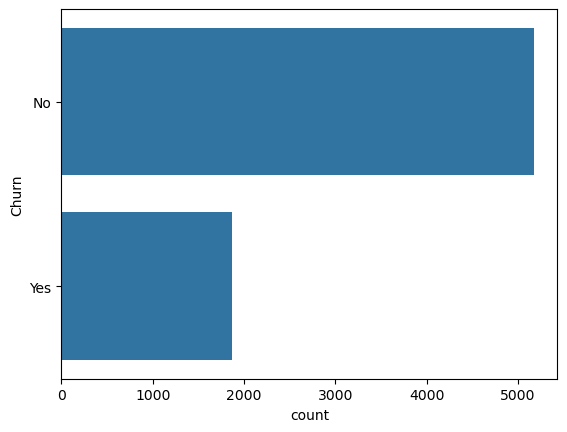

In [15]:
# check distibution in churn columns

check = sns.countplot(df['Churn'])
check

### Handling Missing Values

In [14]:
"74.5"

'74.5'

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
# df.dropna(inplace=True)


In [19]:
df[pd.isna(df['TotalCharges'])]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
1,2,3,4,5,1000


(1, 2, 3, 4, 5, 1000)

In [18]:
(1+2+3+4)/4

2.5

In [19]:
3

3

In [21]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13492\419782261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [23]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df['TotalCharges'].isnull().sum()

0

In [27]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

### Visualizing Distributions

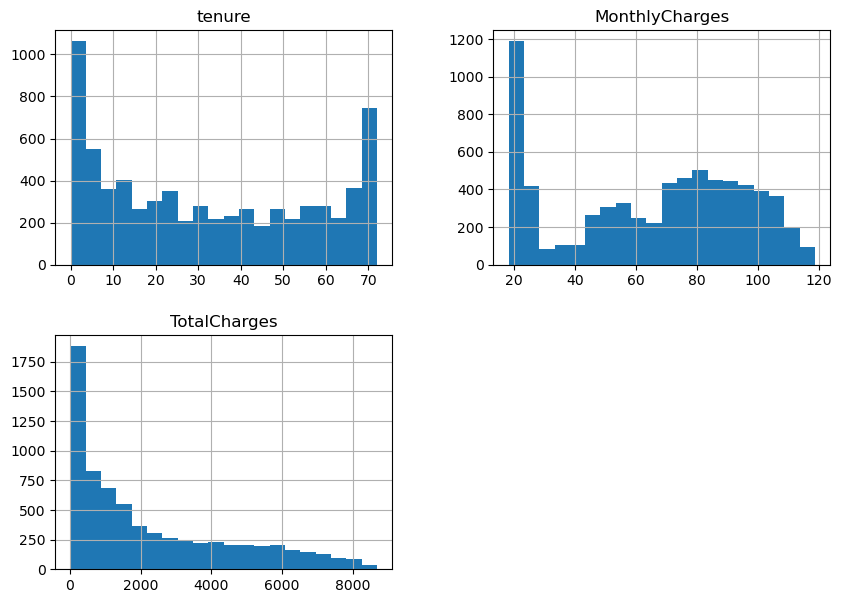

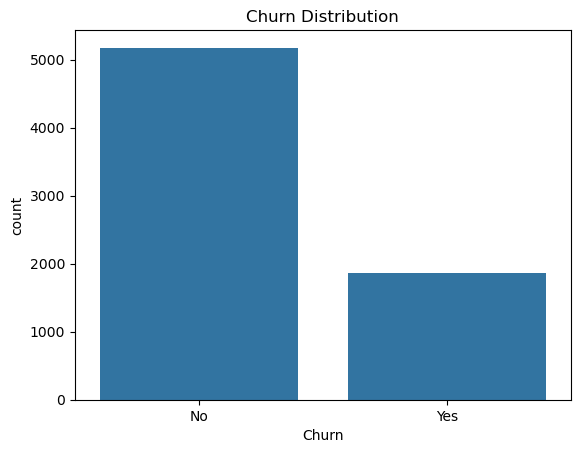

In [29]:
# Visualizing the distribution of numeric columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 7))
plt.show()

# Countplot of churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


### Categorical Feature Analysis

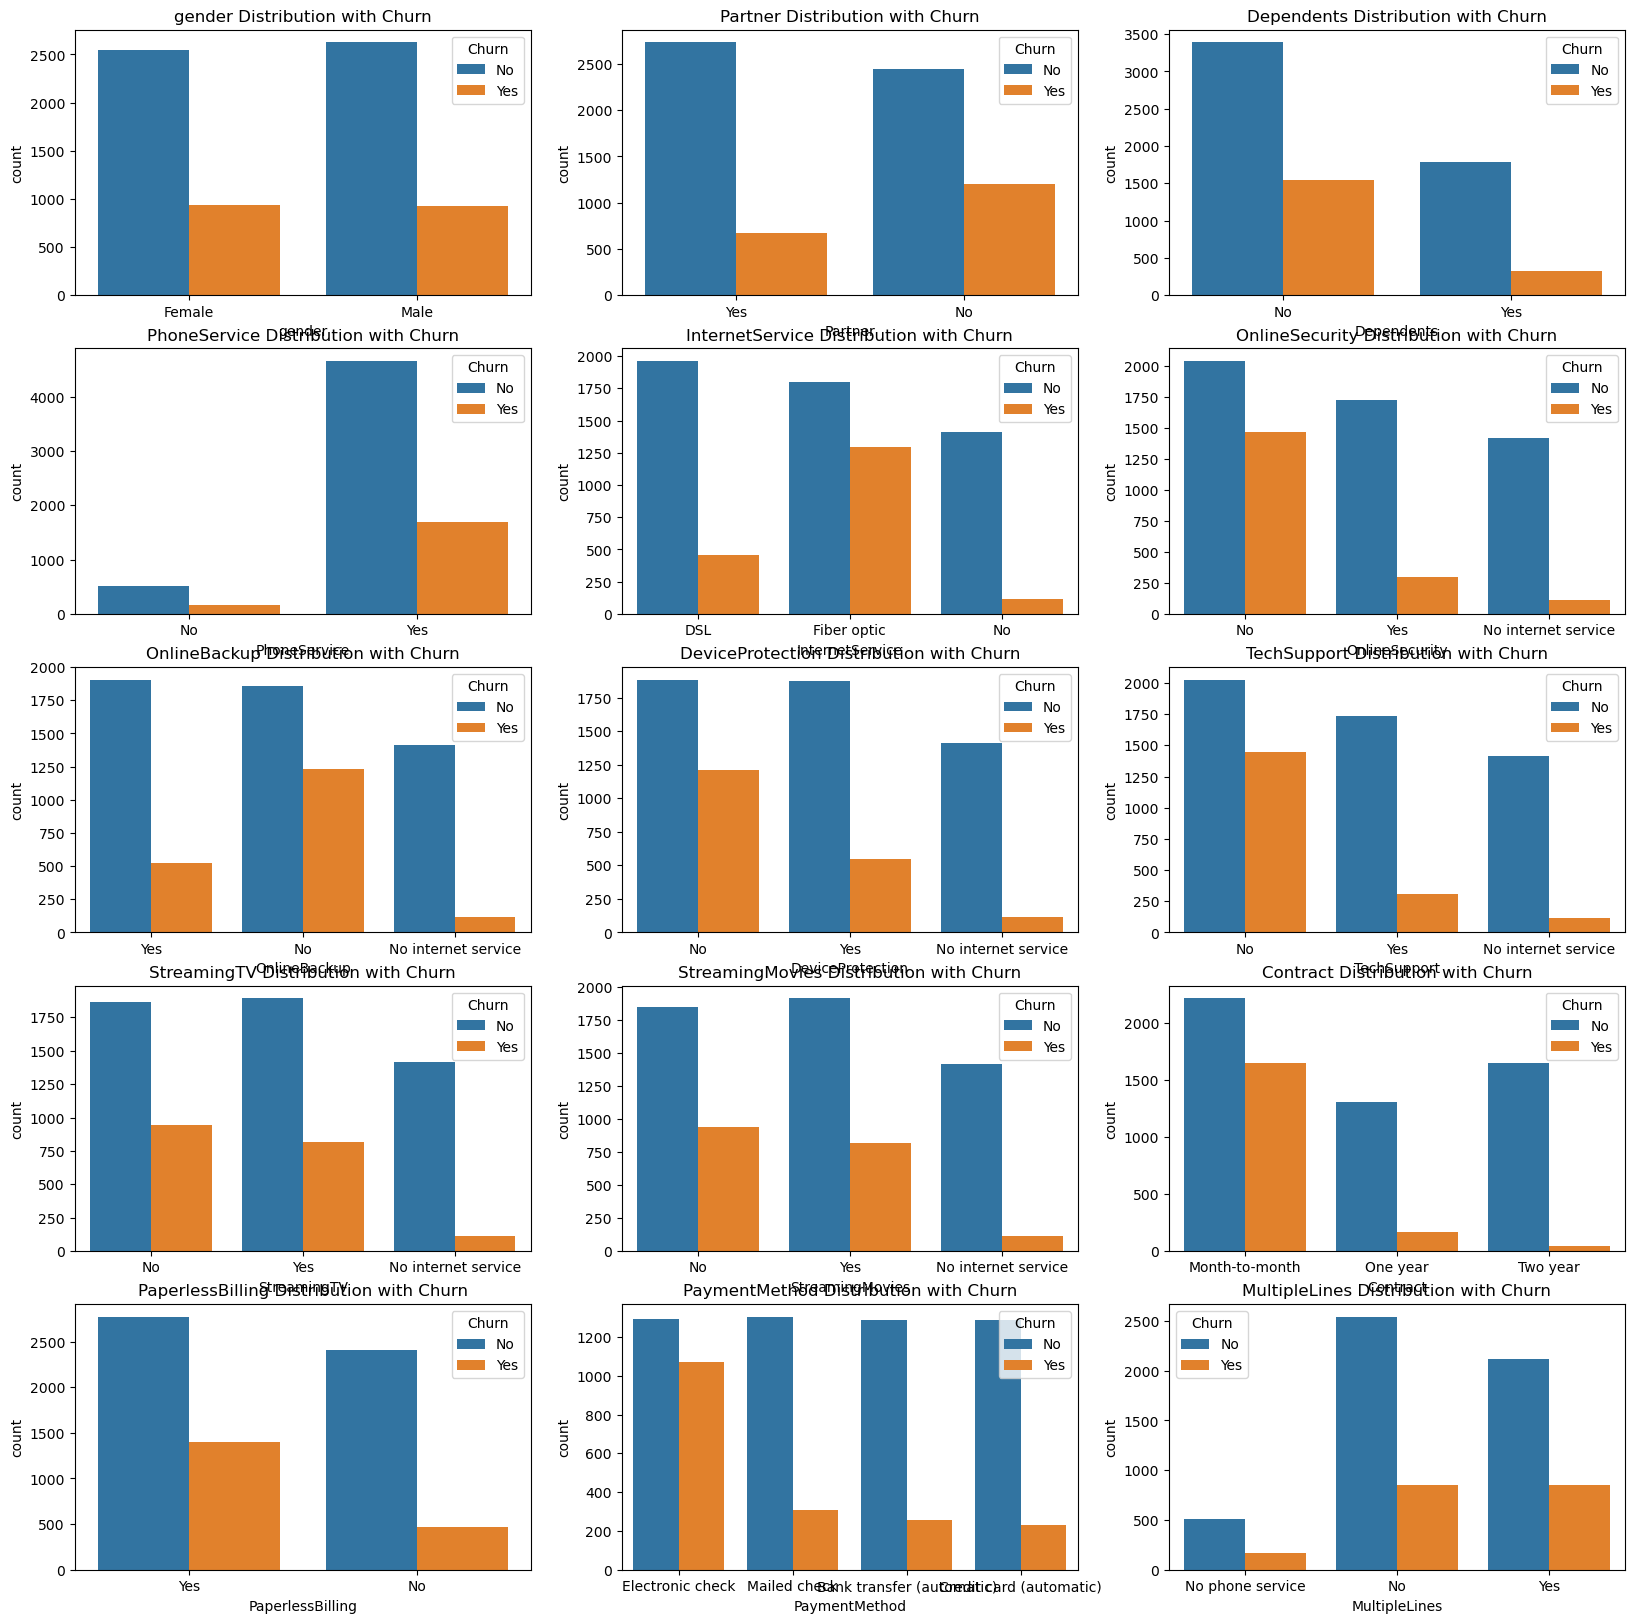

In [31]:
# Plotting count plots for categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','MultipleLines']

plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'{column} Distribution with Churn')
# plt.tight_layout()
plt.show()


### Encoding Categorical Variables

In [33]:
# Label encoding 'gender' column
df['gender'] = LabelEncoder().fit_transform(df['gender'])

df['Churn'].replace({"Yes":1,'No':0},inplace = True)

# One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype = int)

C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13492\3354569640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({"Yes":1,'No':0},inplace = True)
C:\Users\WINDOWS 11-23H2\AppData\Local\Temp\ipykernel_13492\3354569640.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

### Correlation Heatmap

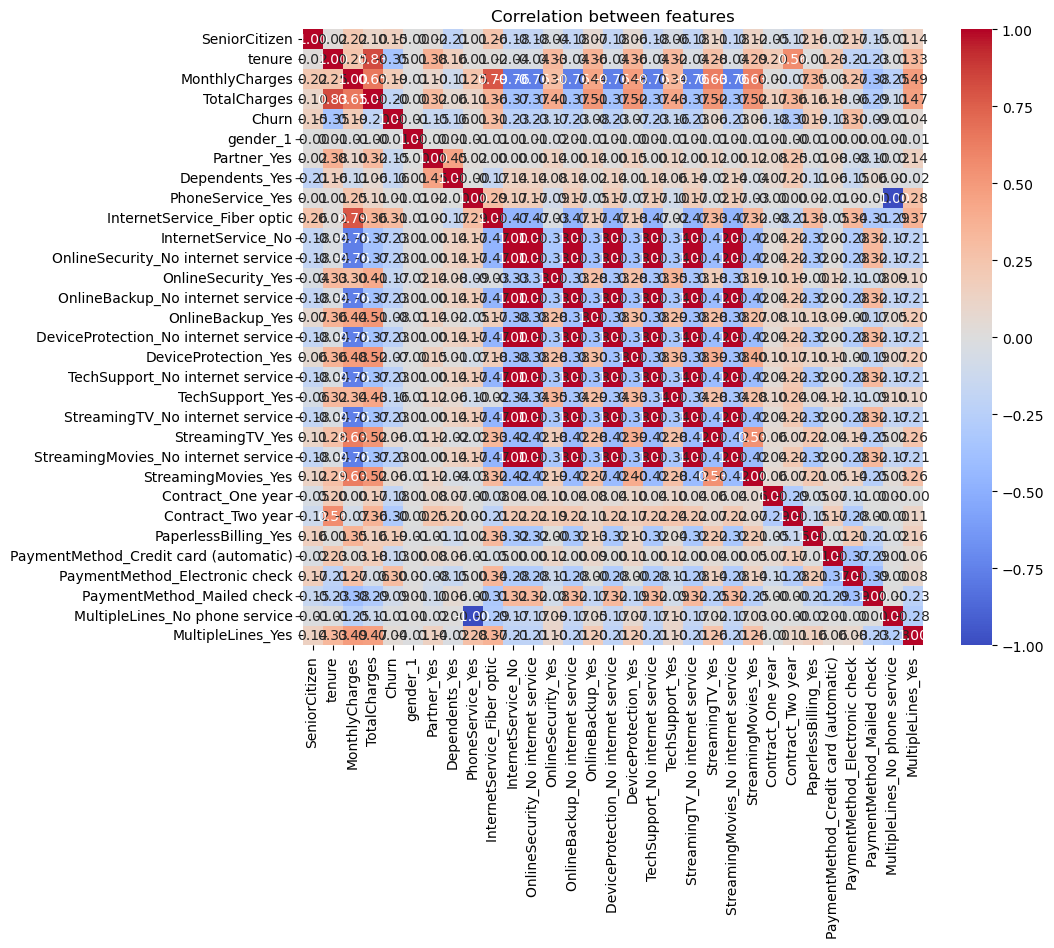

In [35]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between features')
plt.show()


In [37]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2,70.70,151.65,1,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,1,0,1,0,0,1,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,1,...,0,1,1,0,1,1,0,0,0,1
7040,0,11,29.60,346.45,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_1                               7043 non-null   int32  
 6   Partner_Yes                            7043 non-null   int32  
 7   Dependents_Yes                         7043 non-null   int32  
 8   PhoneService_Yes                       7043 non-null   int32  
 9   InternetService_Fiber optic            7043 non-null   int32  
 10  InternetService_No                     7043 non-null   int32  
 11  Onli

###  Feature Scaling

In [35]:
1,4,5,29374

(1, 4, 5, 29374)

In [43]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [45]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.128655,0,1,1,1,1,0,...,0,1,1,0,1,0,0,1,0,1
7039,0,1.613701,1.277533,2.243151,0,0,1,1,1,1,...,0,1,1,0,1,1,0,0,0,1
7040,0,-0.870241,-1.168632,-0.854469,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
7041,1,-1.155283,0.320338,-0.872062,1,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,1


# check some assumption

#### 1. No multicollinearity

# train test split

In [47]:
# Defining X and y
x = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_1                               7043 non-null   int32  
 5   Partner_Yes                            7043 non-null   int32  
 6   Dependents_Yes                         7043 non-null   int32  
 7   PhoneService_Yes                       7043 non-null   int32  
 8   InternetService_Fiber optic            7043 non-null   int32  
 9   InternetService_No                     7043 non-null   int32  
 10  OnlineSecurity_No internet service     7043 non-null   int32  
 11  Onli

In [51]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


# Creating list of model

In [53]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}


In [65]:
d = {'a':10}
for i , value in d.items():
    print(i,value)

a 10


# model training

In [55]:
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict the results
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation score
    cv_score = cross_val_score(model, x, y, cv=5).mean()
    
    # Save results
    results[model_name] = {
        'Test Accuracy': accuracy,
        'CV Accuracy': cv_score,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}, CV Accuracy: {cv_score:.4f}")


Logistic Regression - Test Accuracy: 0.8116, CV Accuracy: 0.8042
Decision Tree - Test Accuracy: 0.7326, CV Accuracy: 0.7240
Random Forest - Test Accuracy: 0.7880, CV Accuracy: 0.7889
SVM - Test Accuracy: 0.8045, CV Accuracy: 0.8022
K-Nearest Neighbors - Test Accuracy: 0.7705, CV Accuracy: 0.7680


# result

In [54]:
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print(f"Cross-Validation Accuracy: {result['CV Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("-" * 50)



Model: Logistic Regression
Test Accuracy: 0.8116
Cross-Validation Accuracy: 0.8042
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

Confusion Matrix:
[[1388  151]
 [ 247  327]]
--------------------------------------------------

Model: Decision Tree
Test Accuracy: 0.7388
Cross-Validation Accuracy: 0.7272
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1539
           1       0.52      0.50      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113

Confusion Matrix:
[[1273  266]
 [ 286  288

# best model

In [57]:
best_model = max(results, key=lambda x: results[x]['Test Accuracy'])
print(f"Best Model: {best_model} with Test Accuracy: {results[best_model]['Test Accuracy']:.4f}")


Best Model: Logistic Regression with Test Accuracy: 0.8116


# Logistic regression give best accurary that why make pickle file for next step

In [61]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

# evaluation on this data set

In [64]:
# evaluation on testing data set

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)
print("accuracy on testing data set :-",accuracy)

# evaluation on training dataset
y_pred_train = model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train , y_train)
print("accuracy on training data set :-",accuracy_train)

accuracy on testing data set :- 0.8116422148603881
accuracy on training data set :- 0.8060851926977688


In [66]:
df.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [68]:
import pickle

# Save the model to a pickle file
with open('logi_churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# Testing on single row

In [ ]:
1,2,3,4,5,1000

In [76]:


column_names = np.array([
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
    'PhoneService', 'MultipleLines', 'InternetService_DSL', 
    'InternetService_Fiber optic', 'InternetService_No', 
    'OnlineSecurity_Yes', 'OnlineSecurity_No', 
    'OnlineBackup_Yes', 'OnlineBackup_No', 
    'DeviceProtection_Yes', 'DeviceProtection_No', 
    'TechSupport_Yes', 'TechSupport_No', 
    'StreamingTV_Yes', 'StreamingTV_No', 
    'StreamingMovies_Yes', 'StreamingMovies_No', 
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
    'PaperlessBilling', 'PaymentMethod_Electronic check', 
    'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer', 
    'PaymentMethod_Credit card', 'MonthlyCharges', 'TotalCharges'
])


input_data = {
    'gender': 'Male',
    'SeniorCitizen': 1,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card',
    'MonthlyCharges': 70.5,
    'TotalCharges': 900.0
}


label_encoded_columns = {
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'MultipleLines': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1}
}


test_array = np.zeros(len(column_names))


for column, mapping in label_encoded_columns.items():
    if column in input_data:
        index = np.where(column_names == column)[0][0]
        test_array[index] = mapping[input_data[column]]


numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for column in numerical_columns:
    if column in input_data:
        index = np.where(column_names == column)[0][0]
        test_array[index] = input_data[column]


one_hot_columns = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaymentMethod'
]

for column in one_hot_columns:
    if column in input_data:
        value = input_data[column]
        one_hot_column = column + '_' + value
        if one_hot_column in column_names:
            index = np.where(column_names == one_hot_column)[0][0]
            test_array[index] = 1

if len(test_array) != model.coef_.shape[1]:
    test_array = test_array[:model.coef_.shape[1]]


prediction = model.predict([test_array])

if prediction == 1:
    print("Churn")
else:
    print("No Churn")


No Churn


C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [88]:
from sklearn.model_selection import train_test_split

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# With random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("x_train:", x_train)
print("x_test:", x_test)

x_train: [1, 8, 3, 10, 5, 4, 7]
x_test: [9, 2, 6]
